# Experimental Methods Exam February 2021

\- Gugliemo Grillo  
MAT. 223450

Zoom link: https://unitn.zoom.us/j/96470214715  
Meeting ID: 964 7021 4715  
Passcode: 278896  

Email:
- [stefano.vitale@unitn.it](mailto:stefano.vitale@unitn.it)

I start by evaluating the true value for $\beta$ and $k$. These are found by solving:

$$ (2\pi \nu)^2 = \omega _0 ^2 = \frac{k}{m} \longrightarrow k = m (2\pi \nu)^2$$

$$ Q^2 = \frac{m^2}{\beta^2} \frac{k}{m} = \frac{m k}{\beta^2} \longrightarrow \beta = \frac{\sqrt{m k}}{Q}$$


In [1]:
# packages used
import scipy.constants # https://docs.scipy.org/doc/scipy/reference/constants.html
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math


# Given parameters
kb = scipy.constants.Boltzmann # J/K
h = scipy.constants.h
c = scipy.constants.c

Nu = 1e9 # Hz
m = 0.5e-15 # Kg
Cs = 5e-15 # Faraday
Im = 100e-6 # Watt
Lambda = 1e-6 # m
Rho = 0.1
Q = 10000
Cp = 60e-15 # Faraday
d = 5e-12 # m/V
Iref = 100e-3 # Watt
T = 4 #K

# Extra parameters
Omega0 = 2*np.pi*Nu
k = m*Omega0**2
Beta = np.sqrt(m*k)/Q

# Show value
display(Math(r"k = m (2\pi \nu)^2="+"{:.5}".format(k)+r"\ Hz^2\ kg"))
display(Math(r"\beta = \frac{\sqrt{m k}}{Q} ="+"{:.5}".format(Beta)+r"\ kg\ Hz"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Question 1  
The transfer function between $V_s$ and $x$ can be obtained by solving the coupled equations given and by noticing that the relation between the input voltage $V_s$ and the current is (I'm using $\partial$ instead of $d$ to avoid confusion with the constant):
$$ I = C_s \frac{\partial (V_s - V)}{\partial t} \longrightarrow I(\omega) =i \omega C_s (V_s-V)$$
This relation with the other two given leads to:
$$x(\omega) = \frac{C_s d}{C_p - C_S} V_s(\omega) + \bigl( \frac{d^2}{C_p + C_s} - \frac{1}{k} \bigr)F(\omega) \simeq 
\frac{C_s d}{C_p + C_S} V_s - \frac{1}{k}F(\omega)$$

Where I dropped the therm $\frac{d^2}{C_p + C_s}$ as it's a lot smaller than $\frac{1}{k}$.

In [2]:
# Here unit of measurements don't seem to be right, but I'm pretty sure the circuit 
# analysis is correct.
display(Math(r"\frac{d^2}{C_p - C_s}="+"{:.5}".format(d**2 / (Cp - Cs))+
             r"\ \frac{m^2}{V^2 F}"))
display(Math(r"\frac{1}{k} ="+"{:.5}".format(1/k)+r"\ Hz^{-2}\ kg^{-1}"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

This formula can be further expanded by considering the relation between the force and the displacement (harmonic oscillator):

$$ \ddot{x} + \frac{\omega_0}{Q}\dot{x} + \omega_0^2 x = \frac{F}{m} \longrightarrow F(\omega) = (-\omega^2+ \frac{i\omega_0}{Q}\omega + \omega_0^2 )m\ x(\omega)$$

This implies 
$$x(\omega) ( 1 + \frac{1}{k}(\omega^2 - \frac{i\omega_0}{Q}\omega - \omega_0^2 ) ) = \frac{C_s d}{C_p + C_S} V_s$$

$$h(\omega) = \frac{V_s(\omega)}{x(\omega)} = \frac{C_p + C_S}{C_s d}+ \frac{C_p + C_s}{C_s d k}(\omega^2 - \frac{i\omega_0}{Q}\omega - \omega_0^2 )$$

Which is the transfer function from $X(\omega)$ to $V_s(\omega)$. I can obtain the transfer function from $V_s(\omega)$ to $X(\omega)$ by taking the reciprocal. It's possible to lighten the notation by choosing:

$$\frac{1}{\omega_1^2} = \frac{C_p + C_s}{C_s d k} $$

$$\frac{1}{\omega_2} = \frac{(C_p + C_s) \omega_0}{Q C_s d k} $$

$$\frac{1}{\omega_3} = \frac{C_p + C_S}{C_s d} -\frac{C_p+C_s}{C_s d k}\omega_0^2$$

In [3]:
Omega12 = Cs*d*k/(Cp + Cs)
Omega2 = Q*Cs*d*k/( (Cp+Cs)*Omega0)
Omega3 = ( (Cp+Cs)/(Cs*d) - (Cp+Cs)/(Cs*d*k)*Omega0**2 )**-1

display(Math(r"\frac{1}{ \omega_1^2} ="+"{:.5}".format(1/Omega12) ))
display(Math(r"\frac{1}{\omega_2} ="+"{:.5}".format(1/Omega2) ))
display(Math(r"\frac{1}{\omega_3} ="+"{:.5}".format(1/Omega3) ))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

So that:

$$h(\omega) = \frac{\omega^2}{\omega_1 ^2} - i \frac{\omega}{\omega_2} + \frac{1}{\omega^3}$$

$$\frac{x(\omega)}{V_s(\omega)} = \frac{1}{\frac{\omega^2}{\omega_1 ^2} - i \frac{\omega}{\omega_2} + \frac{1}{\omega^3}}$$

It's mandatory to highlight the high magnitude of $\frac{1}{\omega_3}$ which dominates the frequency response up to $GHz$.

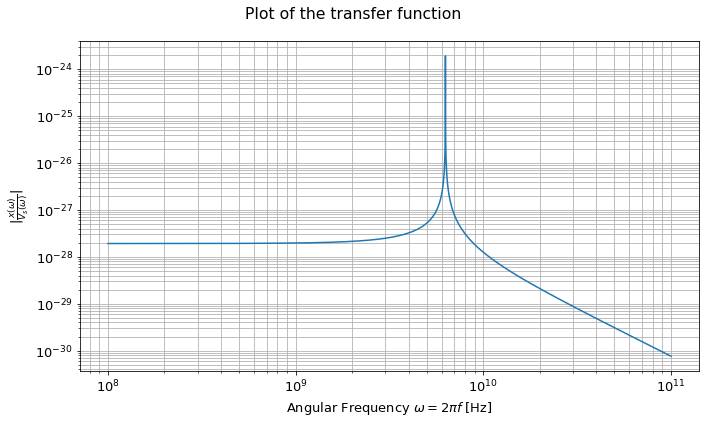

In [4]:
def transfer_function(omega):
    return 1/ ( np.power(omega,2)/Omega12 - 1j*omega/Omega2 + 1/Omega3 )

omega = np.logspace(8, 11, num=int(1e6), endpoint=True, base=10)
y = np.abs( transfer_function(omega) )

plt.rcParams.update({'font.size': 13})

fig, axis = plt.subplots(1,1, figsize=(10, 6))
fig.suptitle("Plot of the transfer function")

axis.set_xscale("log")
axis.set_yscale("log")
axis.plot(omega, y)
axis.set_xlabel(r"Angular Frequency $\omega=2\pi f$ [Hz]")
axis.set_ylabel(r"$|\frac{x(\omega)}{V_s(\omega)}|$")
axis.grid(True, which="both")

plt.tight_layout()
plt.show()

### Question 2  
As the mass is very small it's subjected to the effect of the Brownian noise. Its PSD (one sided) can be evaluated via the fluctuation-dissipation theorem:

$$S_{x,x}^{th, 1S} = \frac{S_{V_s,V_s}^{th, 1S}}{|h(\omega)|^2}= \frac{1}{|h(\omega)|^2} 4 k_b T \frac{\mathcal{Im}[h(\omega)]}{\omega} 
= \frac{4 k_b T}{\omega_2 |h(\omega)|^2} = \frac{4 k_b T}{\omega_2}\frac{1}{(\frac{\omega^2}{\omega_1 ^2}+\frac{1}{\omega^3})^2  + (\frac{\omega}{\omega_2})^2 }$$

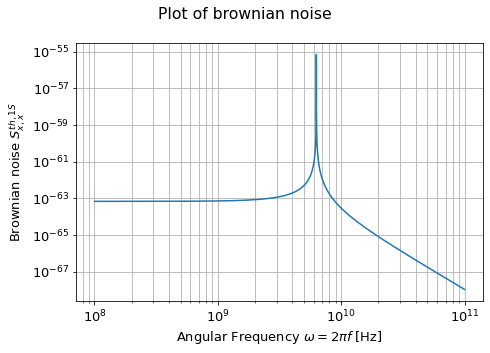

In [6]:
def brownian_noise(omega):
    return 4*kb*T/Omega2 * 1/( np.power((np.power(omega, 2)/Omega12 + 1/Omega3),2 )
                              + np.power(omega/Omega2,2) )
    
omega = np.logspace(8, 11, num=int(1e6), endpoint=True, base=10)
y = brownian_noise(omega)

plt.rcParams.update({'font.size': 13})

fig, axis = plt.subplots(1,1, figsize=(7, 5))
fig.suptitle("Plot of brownian noise")

axis.set_xscale("log")
axis.set_yscale("log")
axis.plot(omega, y)
axis.set_xlabel(r"Angular Frequency $\omega=2\pi f$ [Hz]")
axis.set_ylabel(r"Brownian noise $S_{x,x}^{th, 1S}$")
axis.grid(True, which="both")

plt.tight_layout()
plt.show()

### Question 3
The noise due to the intrinsic fluctuation of the beam is the shot noise associated to the arrive of the photons itself. The shot noise for the two beams is therefore proportional to their intensity:

$$ S_{I_1, I_1}^{1S}(\omega) = 2\frac{h\lambda}{c} I_1 = \frac{h\lambda}{c}(I_{ref}+I_m -\sqrt{I_m I_ref}) cos(\Delta \phi)$$
$$ S_{I_2, I_2}^{1S}(\omega) = 2\frac{h\lambda}{c} I_2 = \frac{h\lambda}{c}(I_{ref}+I_m + \sqrt{I_m I_ref}) cos(\Delta \phi)$$

I'm asked for the readout noise which is proportional to $cos(\Delta \phi)$. The assignment says that the phase is freely adjustable withing $2\pi$ so I resolve to set it so that $cos(\Delta \phi) \rightarrow sin(\Delta \phi) \simeq \Delta \phi$. This is done in order to linearize the expression. This angle is therefore proportional to the difference between the intensities:
$$ I_1 - I_2 = \sqrt{I_m I_{ref}} \ \Delta \phi$$

This means that it's PSD is proportional to the sum of the two single PSD:

$$ S_{\Delta \phi, \Delta \phi}^{1S}(\omega) = \frac{S_{I_1, I_1}^{1S}(\omega) + S_{I_2, I_2}^{1S}(\omega)}{ \sqrt{I_m I_{ref}} ^2} =\frac{2h\lambda}{c} \frac{I_{ref}+I_{m}}{I_{ref} I_m}$$

The relation between the angle and the displacement $\delta x$ is:

$$ \delta x = -\frac{1}{2}\delta l = -\frac{1}{2} \Delta \phi \lambda$$

The beam PSD can then be expressed as displacement PSD:
$$ S_{x, x}^{beam, 1S}(\omega) = \frac{\lambda ^2}{4} S_{\Delta \phi, \Delta \phi}(\omega) =
\frac{h \lambda ^4}{2 c^2} \frac{I_{ref}+I_{m}}{I_{ref} I_m}$$

This value is definitely negligible if compared to the Brownian noise which has magnitude between at $10^{-64}$ and $10^{-55}$ around resonance.

In [7]:
Sshot = h*Lambda**4 /(2*c**2) * (Iref + Im)/(Iref * Im)
display(Math(r"S_{x, x}^{beam, 1S}(\omega) ="+"{:.5}".format(Sshot) ))

<IPython.core.display.Math object>

### Question 4

I plot again the PSD graph around resonance

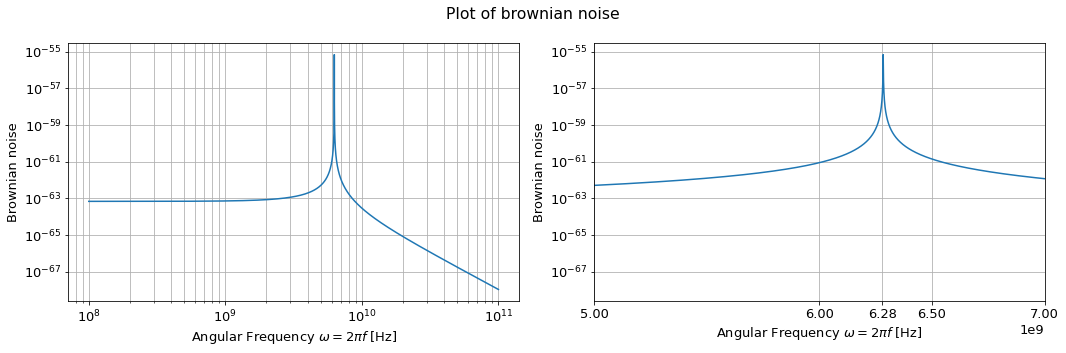

<IPython.core.display.Math object>

In [25]:
omega = np.logspace(8, 11, num=int(1e6), endpoint=True, base=10)
y = brownian_noise(omega)

plt.rcParams.update({'font.size': 13})

fig, axis = plt.subplots(1,2, figsize=(15, 5))
fig.suptitle("Plot of brownian noise")

axis[0].set_xscale("log")
axis[0].set_yscale("log")
axis[0].plot(omega, y)
axis[0].set_xlabel(r"Angular Frequency $\omega=2\pi f$ [Hz]")
axis[0].set_ylabel(r"Brownian noise")
axis[0].grid(True, which="both")

axis[1].set_yscale("log")
axis[1].set_xlim([0.5e10, 0.7e10])
axis[1].set_xticks([0.5e10, 6e9, 6.28e9, 6.5e9, 0.7e10])
axis[1].plot(omega, y)
axis[1].set_xlabel(r"Angular Frequency $\omega=2\pi f$ [Hz]")
axis[1].set_ylabel(r"Brownian noise")
axis[1].grid(True, which="both")


plt.tight_layout()
plt.show()

display(Math(r"\text{Angular Frequency corresponding to the peak:} ="+
             "{:.5}".format(omega[np.argmax(y, axis=0)]/1e9 )))


The peak is located at $\omega=6.28*10^{9} Hz \rightarrow f=10^{9}$ Hz while the narrow line has an approximately width of $\Delta f\simeq(6.5-6)*10^9 Hz = 0.5 GHz$. As the shot noise is much smaller than the thermal noise the time needed to evaluated the PSD of the noise can be obtained trough Dicke's radiometric formula:
$$\rho = \frac{1}{\sqrt{\Delta f T}} \rightarrow T = \frac{\Delta f}{\rho^2}$$

In [26]:
MeasurementTime = 0.5e9/Rho**2

display(Math(r"\text{Minimum measurement time:} ="+
             "{:.5} s".format(MeasurementTime) + r"\simeq 1585 \text{ years}"))
# Which is a very long time...

<IPython.core.display.Math object>

### Question 5

The minimum uncertainty can be evaluated thanks to Wiener's filter theory. As the input is a short pulse (template: $\mathcal{FT}[\delta(t)]=1$) the measurement time can be approximate as going from $-\infty$ to $+\infty$. The minimum uncertainty is therefore:

$$ \sigma ^2 = \frac{1}{\frac{1}{2\pi}\int_0^{+\infty} SNR(\omega) d\omega}$$

where $SNR$ is the signal to noise ratio defined as:

$$ SNR(\omega) = \frac{|f(\omega)|^2}{S_{x,x}(\omega)} = \frac{1}{ S_{x, x}^{beam, 1S}(\omega)+ S_{x,x}^{th, 1S}} $$

This integral can be performed numerically:

In [28]:
def integrand(omega):
    return Sshot + brownian_noise(omega)

I = quad(integrand, 0, np.inf)
display(Math(r'$\text{Value of the integral: }$'+'I={:.4e}'.format(I[0])+
             r'$\text{   Absolute error: }'+'{:.2e}'.format(I[1]) ))
        
sigma2 = 2*np.pi/I[0]
display(Math('\sigma^2 ={:.3e}'.format(sigma2)) )

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Which is a very high error, there is probably a mistake somewhere, but I can't find a way to find it out. My hypothesis is that is something related to the noise PSD as the integral heavily depends on it.